# 1. The dataset social_networking_data.csv contains social networking
service (SNS) information of 30000 anonymous U.S. high school students
who had social networking profile in 2006.
The data include:
1. 30,000 rows.
2. 4 variables indicating personal characteristics - gradyear, gender, age and
friends.
3. 36 variables indicating interests (basketball, football, soccer, etc).
Perform the following operations:
1. Perform EDA on the dataset, with appropriate visualizations.
2. Find out the suitable attributes to group the students into multiple groups
using K-Means.
3. Perform feature engineering on the data.
4. Find out the optimal K-Value using various methods such as elbow method
and Silhouette analysis, with visualizations.
5. Visualize the clusters.
6. Compare the computational performance of “full” vs “elkan” methods.
Note: To use Elkan's variant of K-Means, just set `algorithm="elkan"` in
KMeans. By default, Scikit-Learn uses `"elkan"` for dense data, and `"full"`
(the regular K-Means algorithm) for sparse data.
model = Kmeans(n_clusters = 4, random_state = 42, algorithm = "elkan")
7. Write your analysis of the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# load the CSV file as a dataframe
df = pd.read_csv("C:/Users/hp/Desktop/CDAC/EDBDAMAY2021/PML/Assignments/data/social_networking_data.csv")

In [ ]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.shape

(30000, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [ ]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
df.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [ ]:
df.isnull().sum().sort_values(ascending = False).head()

age       5086
gender    2724
blonde       0
music        0
rock         0
dtype: int64

In [ ]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [ ]:
features = [ 'gradyear', 'age', 'friends']

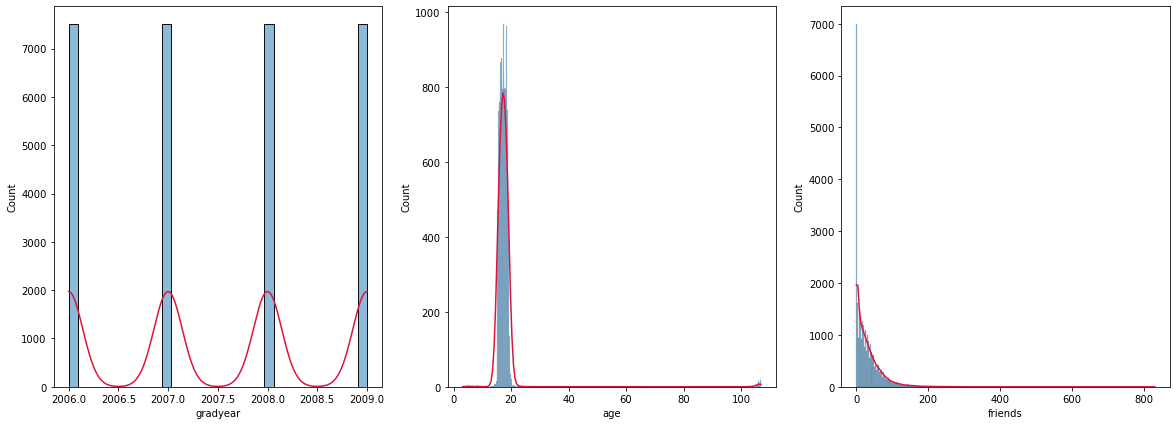

In [ ]:
f, axes = plt.subplots(2,2 , figsize=(20, 7), sharex=False)
pos = 1
for i, feature in enumerate(features):

    plt.subplot(1 , 3 , pos)
    ax = sns.histplot(data=df, x = feature, kde=True, palette="husl")
    ax.lines[0].set_color('crimson')
    pos = pos + 1

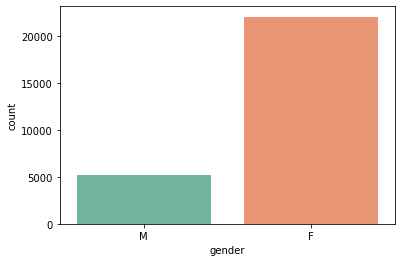

In [ ]:
sns.countplot(x='gender', data=df, palette="Set2")
plt.show()

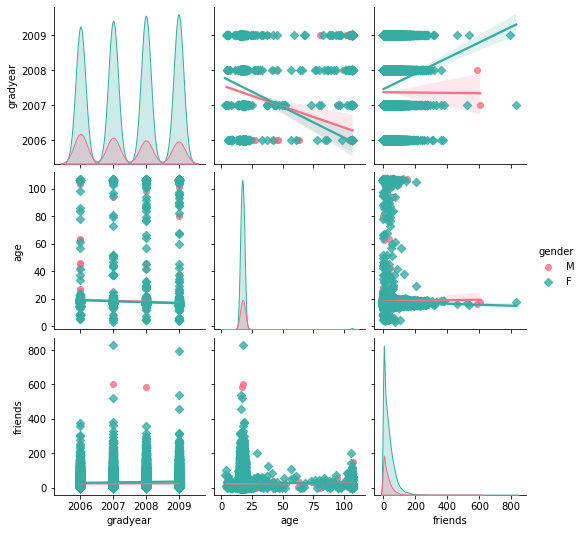

In [ ]:
sns.pairplot(df,
             vars=["gradyear", "age", "friends"],
             kind ="reg",
             hue = "gender",
             palette="husl",
             markers = ['o','D'])

plt.show()

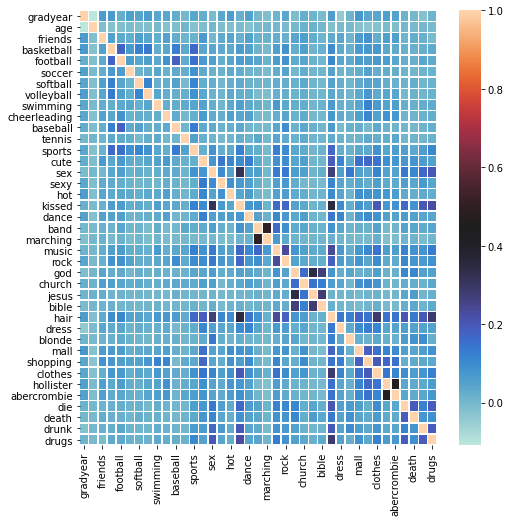

In [ ]:
snd = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(snd, cmap="icefire", linewidths=.5) 
plt.show()

<AxesSubplot:title={'center':'Histogram of the age variable'}, ylabel='Frequency'>

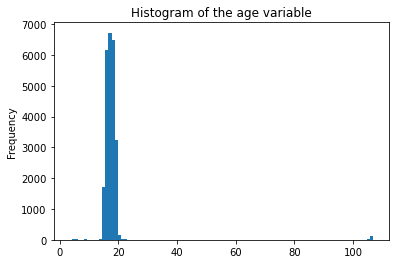

In [ ]:
df['age'].plot.hist(
  bins = 100,
  title = "Histogram of the age variable"
)

<AxesSubplot:>

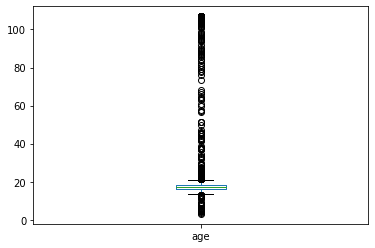

In [ ]:
df['age'].plot.box()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

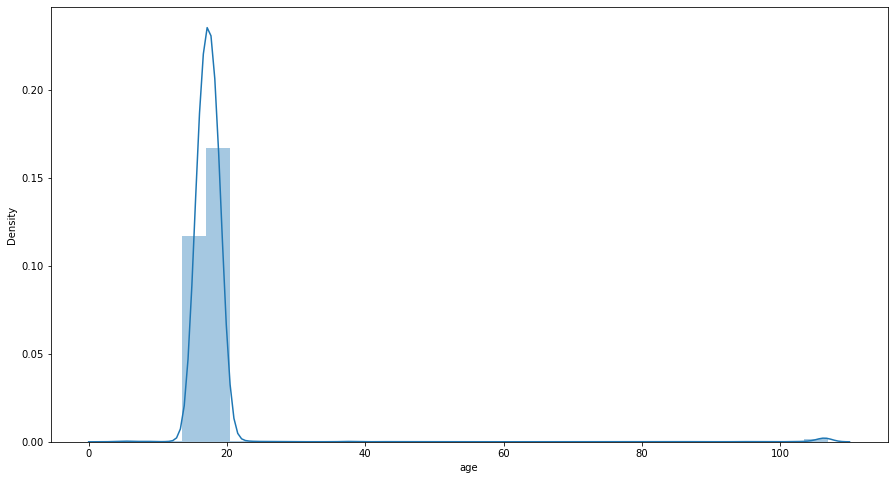

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df.age, bins =30)

,Total,Percent
age,5086,0.169533
gender,2724,0.090800
blonde,0,0.000000
music,0,0.000000
rock,0,0.000000


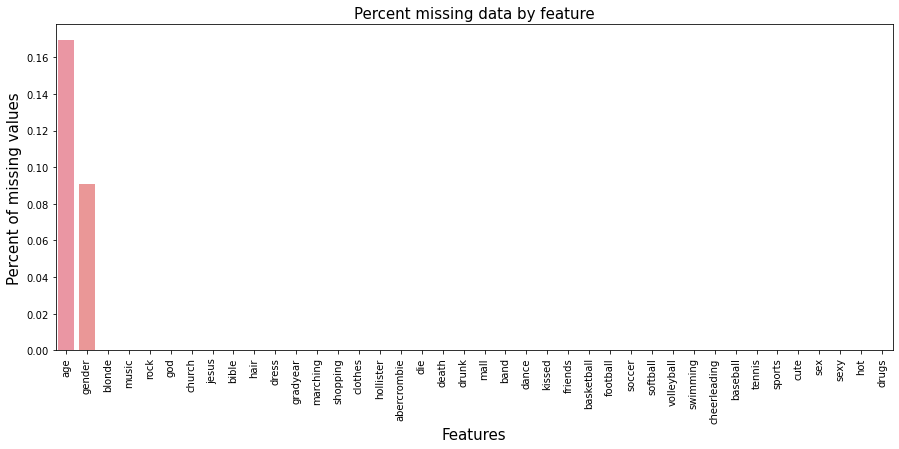

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [ ]:
df.age[df.age < 13] = np.nan
df.age[df.age > 20] = np.nan

<ipython-input-53-1f30515db205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[df.age < 13] = np.nan
<ipython-input-53-1f30515db205>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[df.age > 20] = np.nan


In [ ]:
df.age.isnull().sum()

0

In [ ]:
# Impute NaNs in of Age with the average age of their graudation year
df['age'] = df['age'].fillna(df.groupby('gradyear')['age'].transform('mean'))

In [ ]:
df.isnull().sum()

gradyear           0
gender          2724
age                0
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

<AxesSubplot:title={'center':'Histogram of the age variable'}, ylabel='Frequency'>

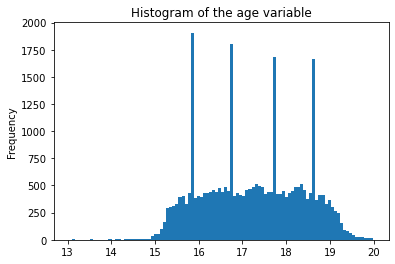

In [ ]:
df['age'].plot.hist(
  bins = 100,
  title = "Histogram of the age variable"
)

In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=None, strategy='constant', fill_value='F')
df.gender = imputer.fit_transform(df['gender'].values.reshape(-1,1))[:,0]
df




NameError: name 'df' is not defined

In [ ]:
df.gender.isnull().sum()

2724

In [ ]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
df.gender = imputer.fit_transform(df['gender'].values.reshape(-1,1))[:,0]

df

ValueError: Input contains NaN